## <center>Multinomial NB</center>

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable $y$ and dependent feature
vector $x_1$ through $x_n$
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}{P(x_1, \dots, x_n)}$$

Using the naive conditional independence assumption that:
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$

for all $i$, this relationship is simplified to

$$ P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$ 

                                 
Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:
$$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}$$

and we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.


<p>The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. (For theoretical reasons why naive Bayes works well, and on which types of data it does, see the references below).

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from <code class="docutils literal notranslate"><span class="pre">predict_proba</span></code> are not to be taken too seriously.</p>

### Insight

MultinomialNB() implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors
$\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ for each class $y$, $n$ is the number of features (in text classification, the size of the vocabulary) and $\theta_{yi}$ is the probability $P(x_i \mid y)$ of feature $i$ appearing in a sample belonging to class $y$

The parameters $\theta_y$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

$$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$$

where $$N_{yi} = \sum_{x \in T} x_i$$ is the number of times feature $i$ appears in a sample of class $y$ in the training set $T$, and $N_{y} = \sum_{i=1}^{n} N_{yi}$ is the total count of all features for class $y$.


The smoothing priors $\alpha \ge 0$ accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting $\alpha = 1$ is called Laplace smoothing,
while $alpha < 1$ is called Lidstone smoothing.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Text data/Data Sets/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
my_map = {
    "ham": 0,
    "spam": 1
}

df["Category"] = df["Category"].map(my_map)

In [4]:
target = df.Category
data = df.Message

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

# Fitting and transforming the CountVectorizer consists of the tokenization of the training data and building of the
# vocabulary, which can be accessed as the vocabulary_ attribute

In [5]:
v = TfidfVectorizer(min_df=5)

X_train_tfidf = v.fit_transform(X_train)
X_test_tfidf = v.transform(X_test)

X_train_tfidf

# We can set the minimum number of documents a token needs to appear in with the min_df parameter, this helps to reduce
# the dimensions of the dataset

<4179x1477 sparse matrix of type '<class 'numpy.float64'>'
	with 46633 stored elements in Compressed Sparse Row format>

In [6]:
print("Vocabulary size: {}".format(len(v.vocabulary_)))


Vocabulary size: 1477


In [7]:
#  To create the bag-of-words representation for the training data, we call the transform method
print("Dense representation of bag_of_words:\n{}".format(X_train_tfidf.toarray()))

Dense representation of bag_of_words:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.98
Best parameters:  {'alpha': 0.01}


In [9]:
from sklearn.metrics import plot_confusion_matrix,classification_report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       1.00      0.91      0.95       186

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


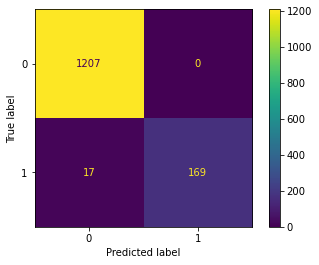

In [10]:
preds = grid.predict(X_test_tfidf)
print(classification_report(y_test,preds))
plot_confusion_matrix(grid, X_test_tfidf, y_test)

The model presents a good performance, scoring almost perfect in the prediction of spam messages, and not discarding the other messages, *ham* messages

###                                                  Stopwords

Another way that we can get rid of uninformative words is by discarding words that are too frequent to be informative. There are two main approaches: using a languagespecific list of stopwords, or discarding words that appear too frequently. scikitlearn has a built-in list of English stopwords in the feature_extraction.text module


In [11]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [12]:
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Top 10 stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[:10]))

Number of stop words: 318
Top 10 stopword:
['part', 'put', 'enough', 'they', 'its', 'why', 'than', 'elsewhere', 'ltd', 'too']


In [13]:
vect = TfidfVectorizer(min_df=5, stop_words="english")
X_train_token2 = vect.fit_transform(X_train)
X_test_tfidf2 = vect.transform(X_test)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print(f"Difference: { len(v.vocabulary_)- len(vect.vocabulary_)}") # In this case there was a reduction of 198 
# characteristics, and the performance of the model stayed the same. The main advantage is the increase in the used 
# time to complete the task.


grid2 = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid2.fit(X_train_token2, y_train)
print("Best cross-validation score: {:.2f}".format(grid2.best_score_))
print("Best parameters: ", grid2.best_params_)

Vocabulary size: 1279
Difference: 198
Best cross-validation score: 0.98
Best parameters:  {'alpha': 1}


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1207
           1       0.98      0.88      0.93       186

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


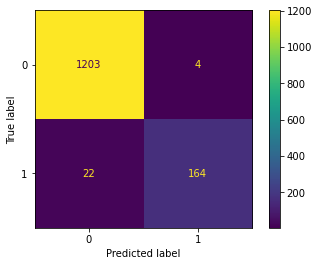

In [14]:
preds = grid2.predict(X_test_tfidf2)
print(classification_report(y_test,preds))
plot_confusion_matrix(grid2, X_test_tfidf2, y_test)

Performance is lowered, however the model is more simplier

###                           Bag-of-Words with More Than One Word (n-Grams)

One of the main disadvantages of using a bag-of-words representation is that word order is completely discarded. Therefore, the two strings “it’s bad, not good at all” and “it’s good, not bad at all” have exactly the same representation, even though the meanings are inverted. Putting “not” in front of a word is only one example (if an extreme one) of how context matters. Fortunately, there is a way of capturing context when using a bag-of-words representation, by not only considering the counts of single tokens, but also the counts of pairs or triplets of
tokens that appear next to each other Pairs of tokens are known as bigrams, triplets of tokens are known as trigrams,
and more generally sequences of tokens are known as n-grams. The ngram_range parameter is a tuple, consisting of the minimum length and the maximum length of the sequences of tokens that are considered

In [15]:
from sklearn.pipeline import make_pipeline

In [17]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), MultinomialNB())
# running the grid search takes a long time because of the relatively large grid and the inclusion of trigrams


param_grid = {"multinomialnb__alpha": [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))





Best cross-validation score: 0.98
Best parameters:
{'multinomialnb__alpha': 0.01, 'tfidfvectorizer__ngram_range': (1, 2)}


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.99      0.91      0.95       186

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


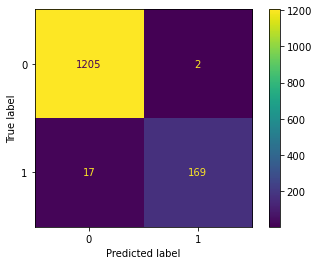

In [18]:
preds = grid.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(grid, X_test, y_test)